# Evaluation HOMEWORK1    
# REPERIMENTO DELL'INFORMAZIONE

Barisan Anna  
Matricola: 1206600

<h2>Tabella con i valori calcolati</h2>      
<h2>MAP, Rprec, Precision at 10</h2>

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [63]:
MAP = np.array([0.2125, 0.2123, 0.1245, 0.1876])
Rprec = np.array([0.2705, 0.2725, 0.1701, 0.2485])
Precision_10 = np.array([0.4820, 0.4780, 0.3020, 0.4260])
models = np.array(['BM25_SL+PS', 'TF*IDF_SL+PS', 'BM25_NoSL+PS', 'TF*IDF_NoSL+NoPS'   ])
d = {'MAP': MAP, 'Rprec': Rprec, 'Precision@10': Precision_10}

In [64]:
results = pd.DataFrame(data=d)
results.rename({0:'BM25_Stoplist_PorterStemmer', 1:'TF*IDF_Stoplist_PorterStemmer', 2:'BM25_NOStoplist_PorterStemmer', 3:'TF*IDF_NOStoplist_NOPorterStemmer'})

,MAP,Rprec,Precision@10
BM25_Stoplist_PorterStemmer,0.2125,0.2705,0.482
TF*IDF_Stoplist_PorterStemmer,0.2123,0.2725,0.478
BM25_NOStoplist_PorterStemmer,0.1245,0.1701,0.302
TF*IDF_NOStoplist_NOPorterStemmer,0.1876,0.2485,0.426


<h2>Plot singoli</h2>

<h3>MAP</h3>

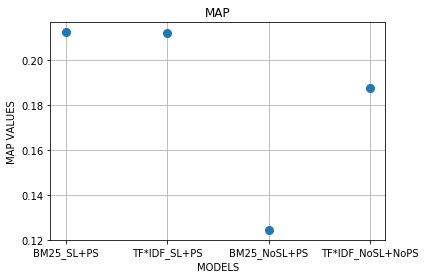

In [65]:
plt.figure(1)
plt.plot(models, MAP, 'o', markersize=8)
plt.grid(True)
plt.xlabel('MODELS')
plt.ylabel('MAP VALUES')
plt.title('MAP')
plt.show()

<h3>Rprec</h3>

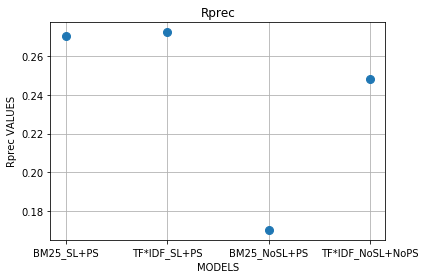

In [66]:
plt.figure(2)
plt.plot(models, Rprec , 'o', markersize=8)
plt.grid(True)
plt.xlabel('MODELS')
plt.ylabel('Rprec VALUES')
plt.title('Rprec')
plt.show()

<h3>Precision at 10</h3>

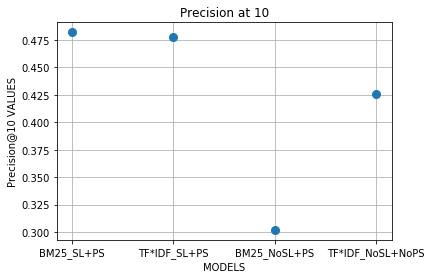

In [67]:
plt.figure(3)
plt.plot(models, Precision_10 , 'o', markersize=8)
plt.grid(True)
plt.xlabel('MODELS')
plt.ylabel('Precision@10 VALUES')
plt.title('Precision at 10')
plt.show()

<h2>Le tre misure insieme</h2>

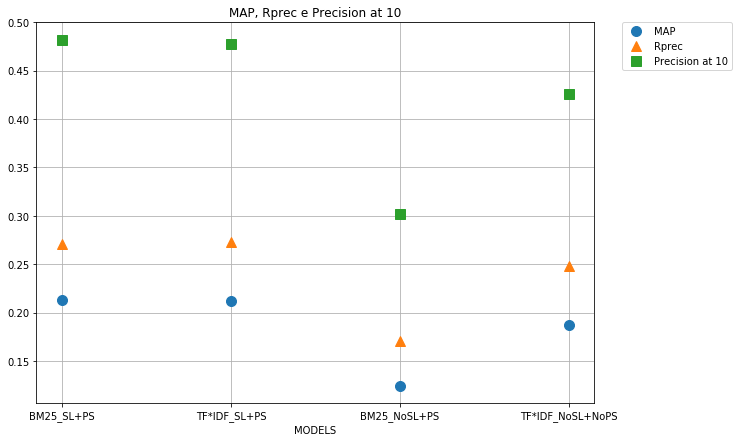

In [68]:
plt.figure(4, figsize=(10,7))
p1= plt.plot(models, MAP, 'o', markersize=10, label = "MAP")
p2 = plt.plot(models, Rprec , 'o', marker = "^", markersize=10, label = 'Rprec')
p3 = plt.plot(models, Precision_10 , 'o', marker = "s", markersize=10, label = 'Precision at 10')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.title('MAP, Rprec e Precision at 10')
plt.xlabel('MODELS')
plt.show()

<h1>ANOVA one-way</h1>

Carico i valori corrispettivi ai quattro diversi sistemi utilizzati.  
Ho trasformato i file di valutazione in formato .csv (in modo da poter caricare i valori); i file .csv sono presenti all'interno del repository.

<h3>BM25_Stoplist_PorterStemmer</h3>

In [69]:
filename = "BM25_SL+PS.csv"
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)), ('value', np.float64, (1,))])
Data = np.genfromtxt(filename, delimiter = ';', dtype = dt)

map_values1 = []
for i in range(Data.shape[0]):
    if(Data[i][0] == "map"):
        map_values1.append(Data[i][2])

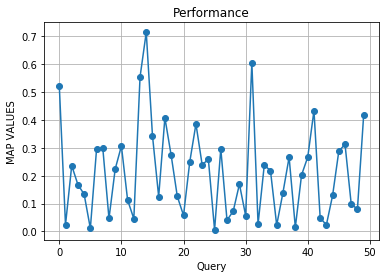

In [70]:
plt.figure(5)
plt.plot(map_values1, marker='o')
plt.grid(True)
plt.xlabel('Query')
plt.ylabel('MAP VALUES')
plt.title('Performance')
plt.show()

<h3> TF*IDF_Stoplist_PorterStemmer</h3>

In [71]:
filename = "TF*IDF_SL+PS.csv"
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)), ('value', np.float64, (1,))])
Data = np.genfromtxt(filename, delimiter = ';', dtype = dt)

map_values2 = []
for i in range(Data.shape[0]):
    if(Data[i][0] == "map"):
        map_values2.append(Data[i][2])

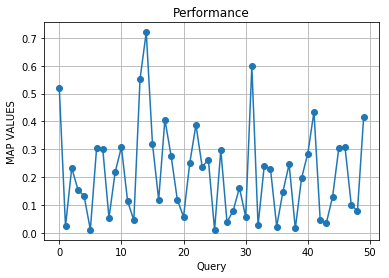

In [72]:
plt.figure(5)
plt.plot(map_values2, marker='o')
plt.grid(True)
plt.xlabel('Query')
plt.ylabel('MAP VALUES')
plt.title('Performance')
plt.show()

<h3>BM25_NOStoplist_PorterStemmer</h3>

In [73]:
filename = "BM25_NoSL+PS.csv"
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)), ('value', np.float64, (1,))])
Data = np.genfromtxt(filename, delimiter = ';', dtype = dt)

map_values3 = []
for i in range(Data.shape[0]):
    if(Data[i][0] == "map"):
        map_values3.append(Data[i][2])

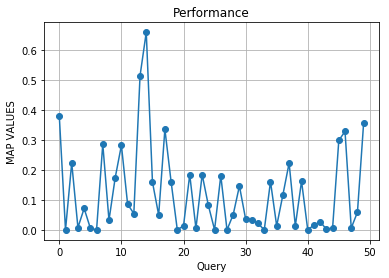

In [74]:
plt.figure(5)
plt.plot(map_values3, marker='o')
plt.grid(True)
plt.xlabel('Query')
plt.ylabel('MAP VALUES')
plt.title('Performance')
plt.show()

<h3>BM25_NOStoplist_NOPorterStemmer</h3>

In [75]:
filename = "TF*IDF_NoSL+NoPS.csv"
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)), ('value', np.float64, (1,))])
Data = np.genfromtxt(filename, delimiter = ';', dtype = dt)

map_values4 = []
for i in range(Data.shape[0]):
    if(Data[i][0] == "map"):
        map_values4.append(Data[i][2])

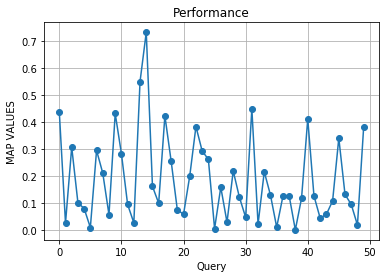

In [76]:
plt.figure(5)
plt.plot(map_values4, marker='o')
plt.grid(True)
plt.xlabel('Query')
plt.ylabel('MAP VALUES')
plt.title('Performance')
plt.show()

    
    
Eseguire il test statistico ANOVA permette di vedere se ci sono differenze statisticamente significative tra diversi gruppi di variabili, nel nostro caso se ci sono differenze tra i diversi modelli usati per la creazione dell'indice e nel reperimento. Vedere quindi se c'è una relazione tra il modello e le specifiche fasi (rimozione delle stopword e stemming) utilizzate e il conseguente indice creato, che è stato poi valutato.   
Utilizziamo la funzione

    stats.f_oneway
    
per eseguire il calcolo.

In [77]:
f, pvalue = stats.f_oneway(map_values1, map_values2, map_values3, map_values4)
print("F: " + str(f))
print("P-value: " + str(pvalue))

F: [3.27623957]
P-value: [0.02214361]


La null hypothesis viene rigettata in quanto $p\leq\alpha$  ( $0.02214\leq0.05$ ); possiamo affermare perciò che almeno un modello ha una media con differenza statisticamente significativa rispetto ad un altro modello ma non possiamo ancora dire quale: dobbiamo confrontare ogni coppia di modelli per determinare quali sono quelle significativamente differenti e per fare questo eseguiremo il test di Turkey utilizzando la multiple comparison.

Eseguiamo il test ANOVA 1-way anche in un altro modo, senza utilizzare l'apposita funzione, per ottenere maggiori informazioni.

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#create the table with all values
name1 = ['BM25_SL+PS']*50
name2 = ['TF*IDF_SL+PS']*50
name3 = ['BM25_NoSL+PS']*50
name4 = ['TF*IDF_NoSL+NoPS']*50
d = {'value': map_values1 + map_values2 + map_values3 + map_values4, 
     'model': name1 + name2 + name3 + name4}

results = pd.DataFrame(data=d)
#print(results)

In [79]:
values = np.array(map_values1 + map_values2 + map_values3 + map_values4)
model = np.array(name1 + name2 + name3 + name4)

model = ols('values ~ model', data = results).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 values   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.276
Date:                Thu, 03 Jan 2019   Prob (F-statistic):             0.0221
Time:                        16:10:23   Log-Likelihood:                 82.093
No. Observations:                 200   AIC:                            -156.2
Df Residuals:                     196   BIC:                            -143.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.1245      0.023      5.429      0.000       0.079       0.170
model[T.BM25_SL+PS]           0.0880      0.032      2.715      0.007       0.024       0.152
model[T.TF*IDF_NoSL+NoPS]     0.0632      0.032      1.948      0.053      -0.001       0.127
model[T.TF*IDF_SL+PS]         0.0878      0.032      2.707      0.007       0.024       0.152
==============================================================================
Omnibus:                       34.808   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.166
Skew:                           1.088   Prob(JB):                     5.73e-11
Kurtosis:                       3.962   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#more synthetic way
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

            sum_sq     df        F    PR(>F)
model     0.258388    3.0  3.27624  0.022144
Residual  5.152669  196.0      NaN       NaN


<h3>PLOT estimators</h3>

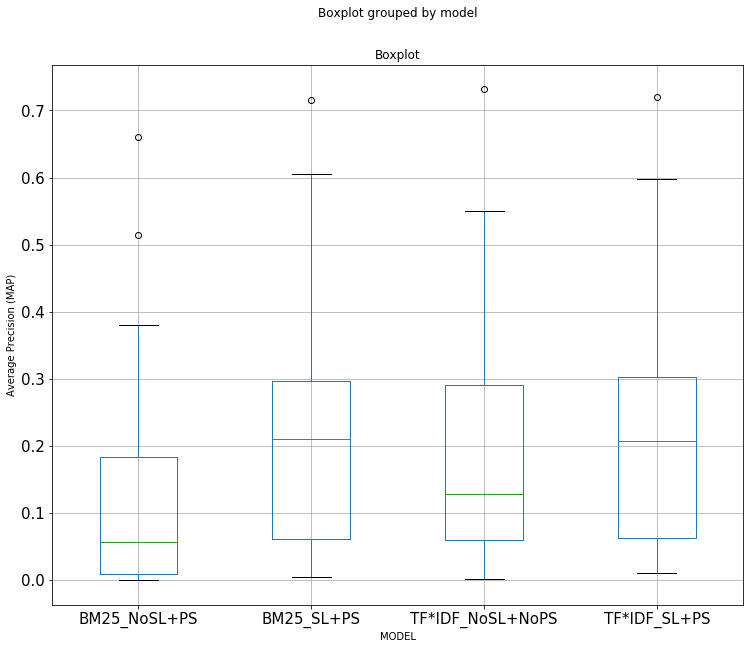

In [81]:
results.boxplot('value', by = 'model', figsize=(12,10), fontsize = 15)
plt.title('Boxplot')
plt.ylabel('Average Precision (MAP)')
plt.xlabel('MODEL')
plt.show()

Modelli:
- BM25_SL+PS : BM25, Stoplist, Porter Stemmer
- TF*IDF_SL+PS : TF*IDF, Stoplist, Porter Stemmer
- BM25_NoSL+PS : BM25, No Stoplist, Porter Stemmer
- TF*IDF_NoSL+NoPS : TF*IDF, No Stoplist, No Stemmer

<h1>Test di TURKEY</h1>

Eseguiamo il test di Turkey per determinare qual è/quali sono i modelli significativamente differenti,  utilizzando la multiple comparison.

In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

values = np.array(map_values1 + map_values2 + map_values3 + map_values4)
model = np.array(name1 + name2 + name3 + name4)

mc = MultiComparison(values, model)
results = mc.tukeyhsd()
print(results)
print(mc.groupsunique)

       Multiple Comparison of Means - Tukey HSD,FWER=0.05       
     group1           group2      meandiff  lower  upper  reject
----------------------------------------------------------------
  BM25_NoSL+PS      BM25_SL+PS     0.088    0.004  0.1721  True 
  BM25_NoSL+PS   TF*IDF_NoSL+NoPS  0.0632  -0.0209 0.1472 False 
  BM25_NoSL+PS     TF*IDF_SL+PS    0.0878   0.0037 0.1718  True 
   BM25_SL+PS    TF*IDF_NoSL+NoPS -0.0249  -0.1089 0.0591 False 
   BM25_SL+PS      TF*IDF_SL+PS   -0.0003  -0.0843 0.0838 False 
TF*IDF_NoSL+NoPS   TF*IDF_SL+PS    0.0246  -0.0594 0.1087 False 
----------------------------------------------------------------
['BM25_NoSL+PS' 'BM25_SL+PS' 'TF*IDF_NoSL+NoPS' 'TF*IDF_SL+PS']


Le colonne "group1" e "group2" sono la coppia che viene confrontata, la colonna "meandiff" è la differenza nelle medie dei due gruppi calcolati come group2-gruop1, le colonne "lower" e "upper" rappresentano i limiti inferiore e superiore dell'intervallo di confidenza e l'ultima colonna indica se la null hypotesis deve essere rifiutata o meno.  
   
Si può notare che il primo e il terzo intervallo non contengono l'origine e quindi comportano un rifiuto dell'ipotesi H0 evidenziando l'importante differenza tra i modelli "BM25_NoSL+PS"-"BM25_SL+PS" e "BM25_NoSL+PS"-"TF*IDF_SL+PS".  
Ciò si può osservare anche nei plot seguenti.  
Possiamo concludere quindi che i sistemi appartenenti al top group sono i primi due "BM25_SL+PS" e "TF*IDF_SL+PS"; essi sono significativamente diversi dal terzo modello "BM25_NoSL+PS" che non appartiene a questa categoria. Il quarto modello "TF*IDF_NoSL+NoPS" non è diverso dai primi due, però si intuisce una differenza, tenendo anche presente che esso non risulta significativamente diverso dal terzo sistema.

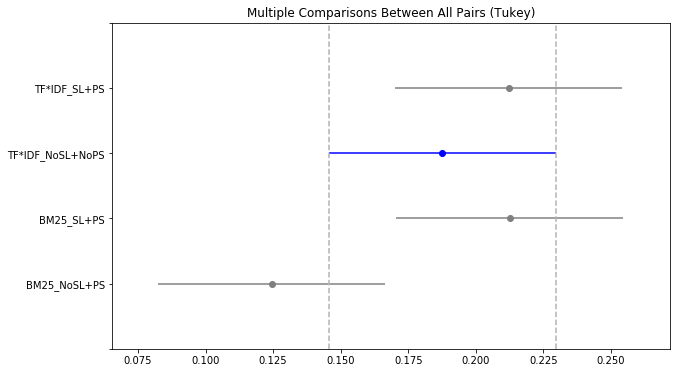

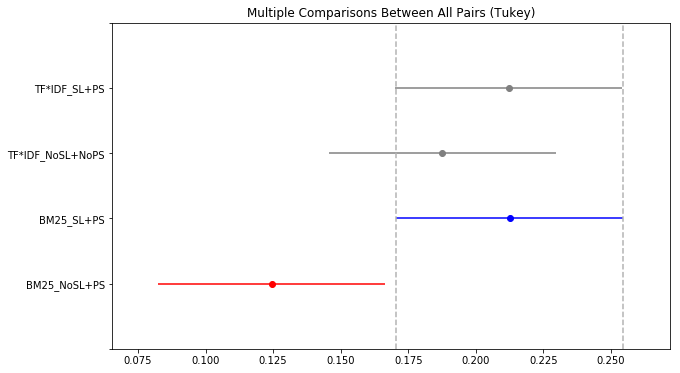

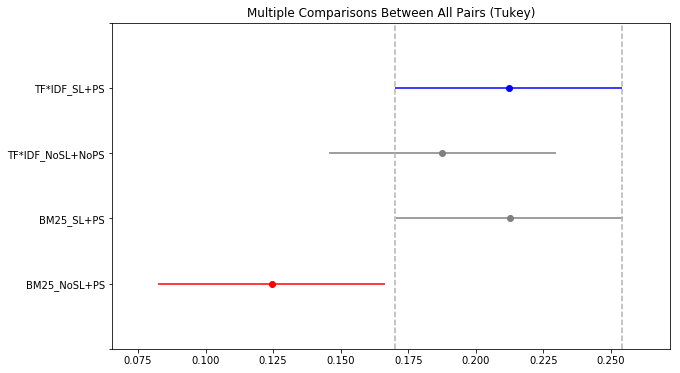

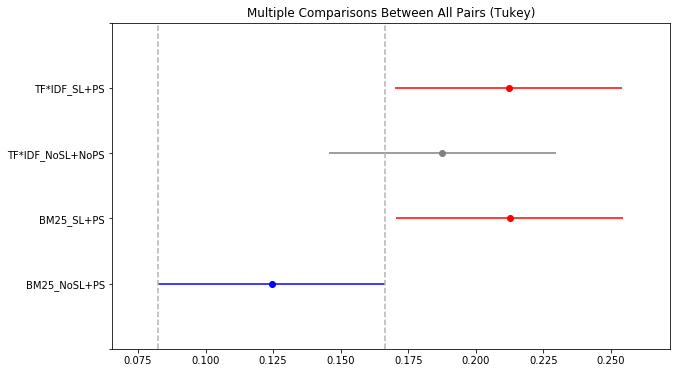

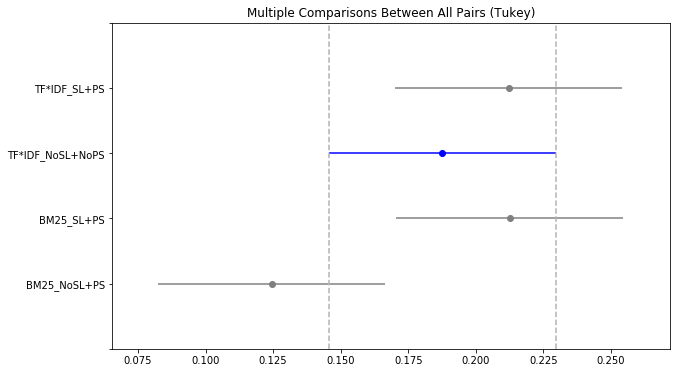

In [83]:
results.plot_simultaneous(comparison_name="BM25_SL+PS")
results.plot_simultaneous(comparison_name="TF*IDF_SL+PS")
results.plot_simultaneous(comparison_name="BM25_NoSL+PS")
results.plot_simultaneous(comparison_name="TF*IDF_NoSL+NoPS")

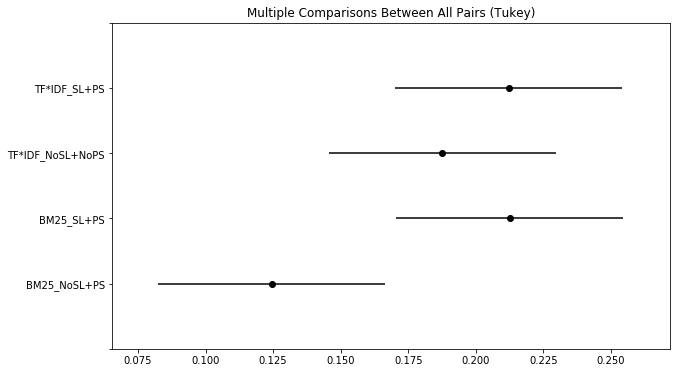

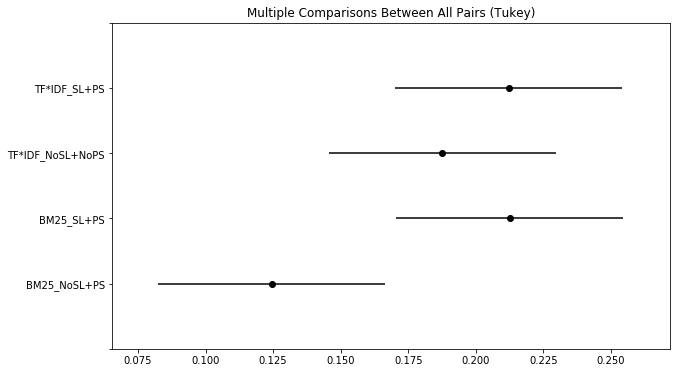

In [84]:
results.plot_simultaneous()